# California Housing Price Prediction  
---
![California](https://static.independent.co.uk/2023/06/23/15/iStock-468040530.jpg)
---  
**The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.**  

---
## <u>Columns  
1. **longitude:** A measure of how far west a house (a higher value is farther west)
2. **latitude:** A measure of how far north a house is (a higher value is farther north)
3. **housingMedianAge:** Median age of a house within a block (a lower number is a newer building)
4. **totalRooms:** Total number of rooms within a block
5. **totalBedrooms:** Total number of bedrooms within a block
6. **population:** Total number of people residing within a block
7. **households:** Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars) 
9. **medianHouseValue:** Median house value for households within a block (measured in US Dollars)
10. **oceanProximity:** Location of the house w.r.t ocean/sea
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing = housing.dropna()

In [7]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

# Feature Engineering
---

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

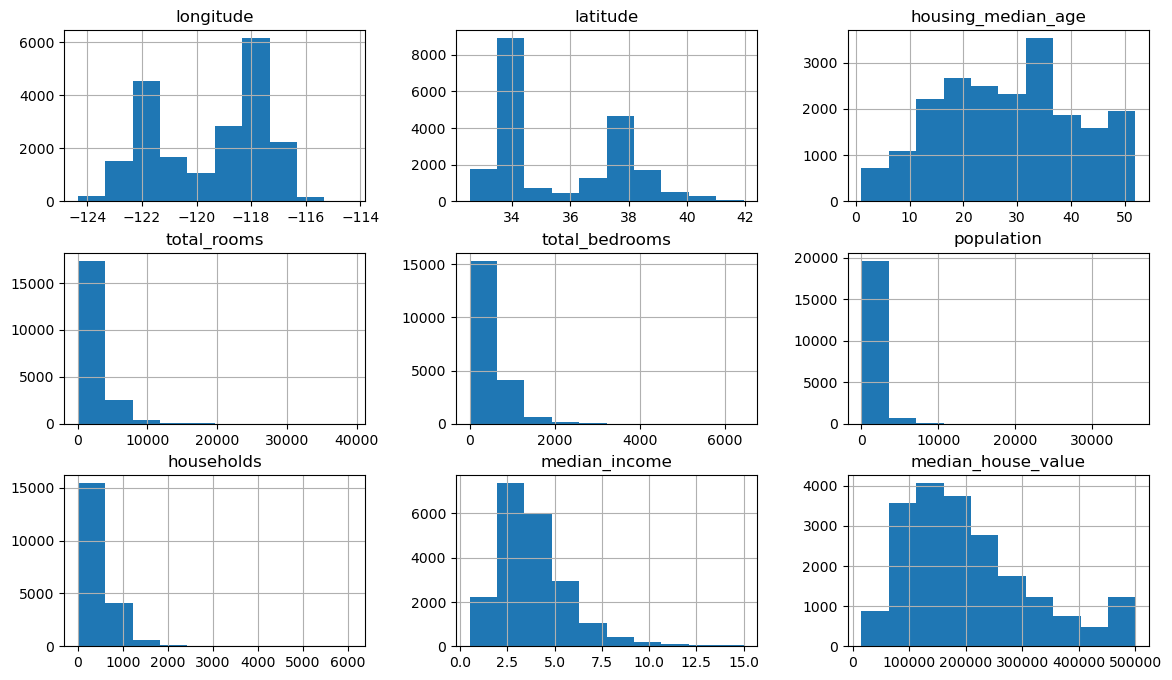

In [8]:
housing.hist(figsize = (14, 8))

### Convert to normal distribution using log transformation

In [9]:
housing["total_rooms"] = np.log(housing["total_rooms"] + 1)
housing["total_bedrooms"] = np.log(housing["total_bedrooms"] + 1)
housing["population"] = np.log(housing["population"] + 1)
housing["households"] = np.log(housing["households"] + 1)

C:\Users\YourName\AppData\Local\Temp\ipykernel_4092\2105421352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["total_rooms"] = np.log(housing["total_rooms"] + 1)
C:\Users\YourName\AppData\Local\Temp\ipykernel_4092\2105421352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["total_bedrooms"] = np.log(housing["total_bedrooms"] + 1)
C:\Users\YourName\AppData\Local\Temp\ipykernel_4092\2105421352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

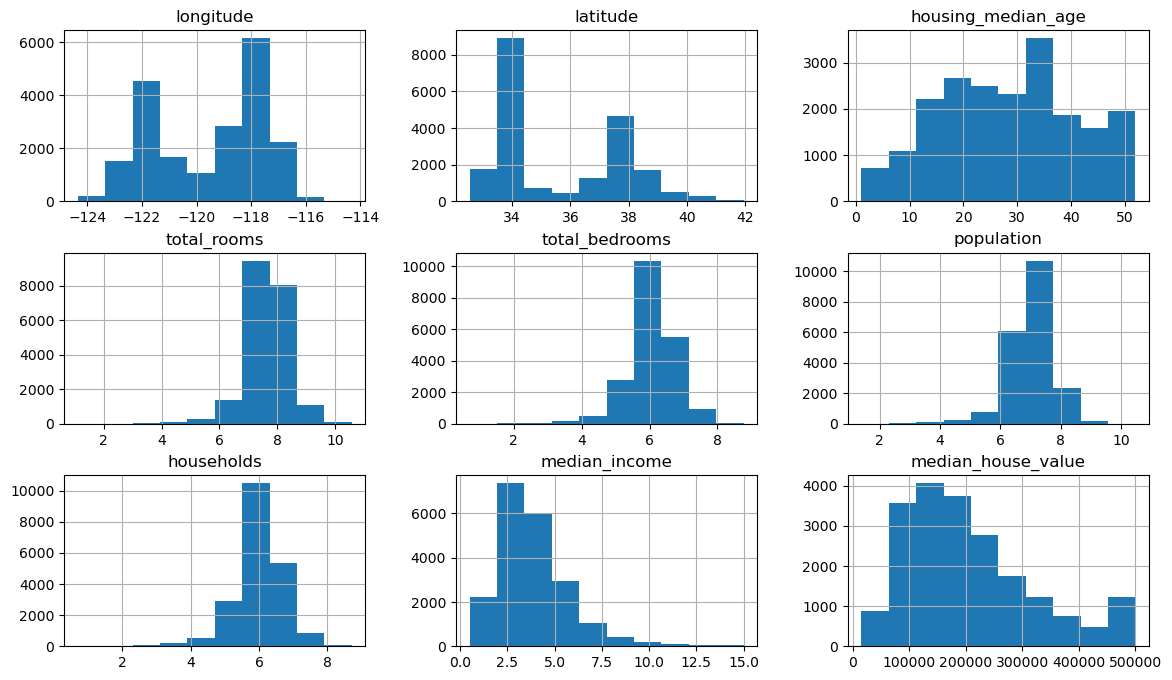

In [10]:
housing.hist(figsize = (14, 8))

## Correlation
---

In [11]:
x = housing.drop(columns = "ocean_proximity").corr()

In [12]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000


In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_feature = correlation(x, 0.9)

In [15]:
corr_feature

{'households', 'latitude', 'population', 'total_bedrooms'}

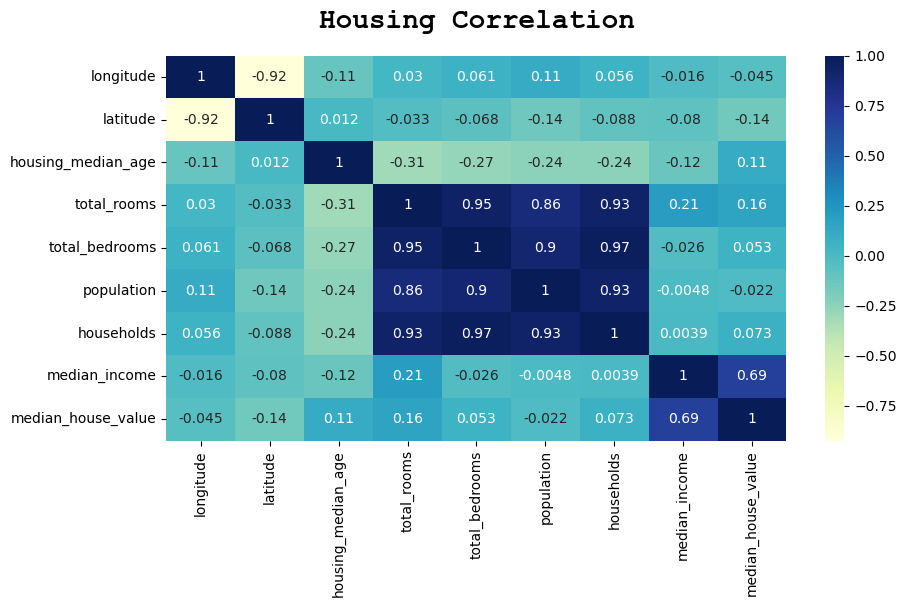

In [16]:
plt.figure(figsize = (10,5))

sns.heatmap(x, annot = True, cmap = "YlGnBu")

plt.title("Housing Correlation", font = "Courier New", weight = "bold", size = 20, y = 1.05)
plt.show()

### <u>households  
**Correlate with**  
- total_rooms
- total_bedrooms
- population  

**Choose the one that correlate with y(median_house_value) the most**  
- households = 0.073
- **total_rooms = 0.16**
- total_bedrooms = 0.053
- population = -0.022 

**popultion have a negative correlation so will keep it too**
### Choose: total_room, population

### <u>latitude  
**Correlate with**
- longitude  

### latitude and longitude must pair together so will keep both

In [17]:
# Drop columns ["households", "total_bedrooms", "population"]
housing_new = housing.drop(columns = ["households", "total_bedrooms"])

housing_new

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,5.777652,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.784057,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,6.208590,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,6.326149,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,6.338594,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,6.740519,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.548219,5.877736,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,7.720905,6.915723,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,7.528869,6.609349,1.8672,84700.0,INLAND


## One hot encoding for ocean_proximity
---

In [18]:
dummies_var = pd.get_dummies(housing_new["ocean_proximity"]).astype(int)

dummies_var

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [19]:
housing_new = pd.concat([housing_new, dummies_var], axis = 1).drop(columns = "ocean_proximity")

housing_new

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,5.777652,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.784057,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,6.208590,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,6.326149,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,6.338594,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,6.740519,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.877736,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.915723,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.609349,1.8672,84700.0,0,1,0,0,0


In [20]:
y = housing_new.corr()

y

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.109259,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.136543,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.243011,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.864580,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862
population,0.109259,-0.136543,-0.243011,0.864580,1.000000,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.004850,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,-0.021904,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.115020,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018
INLAND,-0.055337,0.351084,-0.236968,-0.012862,-0.071775,-0.237536,-0.484787,-0.607778,1.000000,-0.010681,-0.241356,-0.262289
ISLAND,0.009501,-0.016662,0.017105,-0.007567,-0.012866,-0.009281,0.023525,-0.013928,-0.010681,1.000000,-0.005531,-0.006011


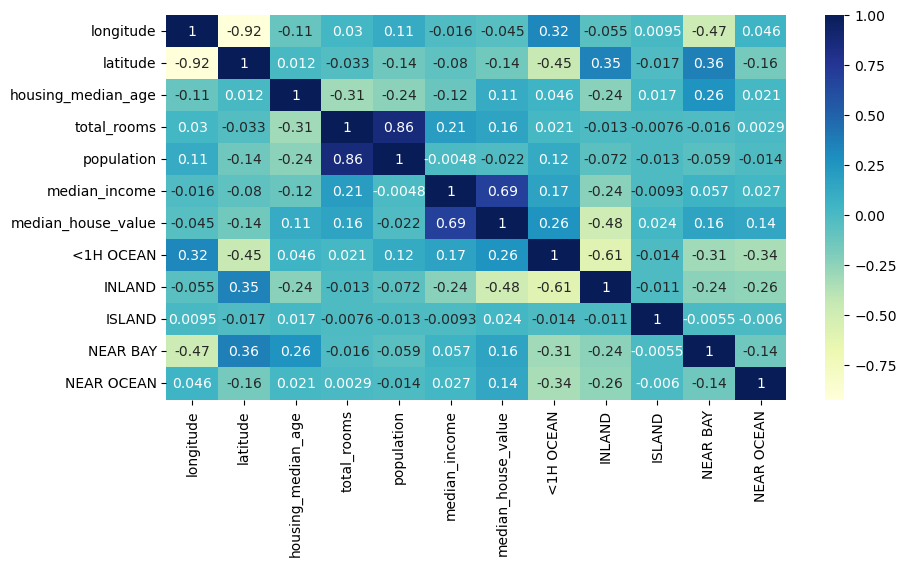

In [21]:
plt.figure(figsize = (10,5))

sns.heatmap(y, annot = True, cmap = "YlGnBu")

plt.show()

### From above heat map  
**The close to the ocean the high median_house_value is**

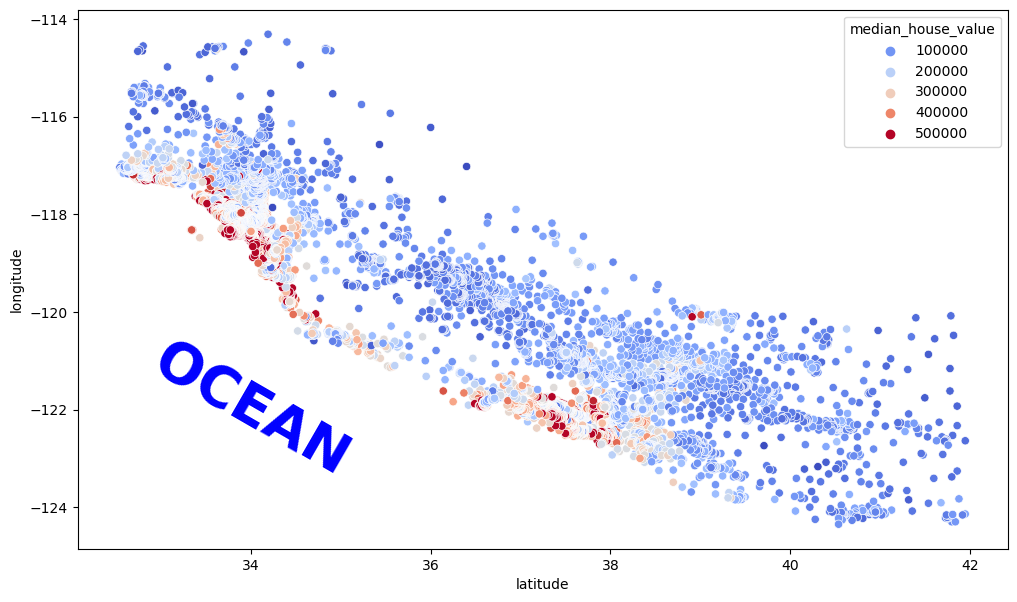

In [22]:
plt.figure(figsize = (12, 7))

sns.scatterplot(x = housing_new["latitude"], y = housing_new["longitude"], hue = housing_new["median_house_value"], palette = "coolwarm")

plt.text(34, -122, "OCEAN", ha = "center", va = "center", color = "blue", size = 40, weight = "bold", rotation = -30)

plt.show()

![California coast](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Coastal_California_Map.svg/1200px-Coastal_California_Map.svg.png)

### Area near ocean tend to have higher value

---
# Linear Regression model
---

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [24]:
X = housing_new.drop(columns = "median_house_value")
Y = housing_new[["median_house_value"]]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [26]:
housing_linear_model = LinearRegression()

In [27]:
housing_linear_model.fit(x_train, y_train)

LinearRegression()

In [28]:
housing_linear_model.score(x_test, y_test)

0.6358019470622559

---
# Random Forest Regressor model
---

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
housing_randomforest_model = RandomForestRegressor()

In [31]:
housing_randomforest_model.fit(x_train, y_train.values.ravel())

RandomForestRegressor()

In [32]:
housing_randomforest_model.score(x_test, y_test)

0.8169122631225096

## In conclusion the Random Forest Regressor model give the more accurate value of price prediction